In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
from matplotlib import rc
rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 17

In [2]:
# Read in the lagged results for both ESSENCE and ED for all years (2019 - 2022)
lagESSENCE = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_resultsAllYears_KATE_ESSENCE.csv")
lagED = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/casecrossoverData/lagged_results/lagged_resultsAllYears_KATE_ED.csv")

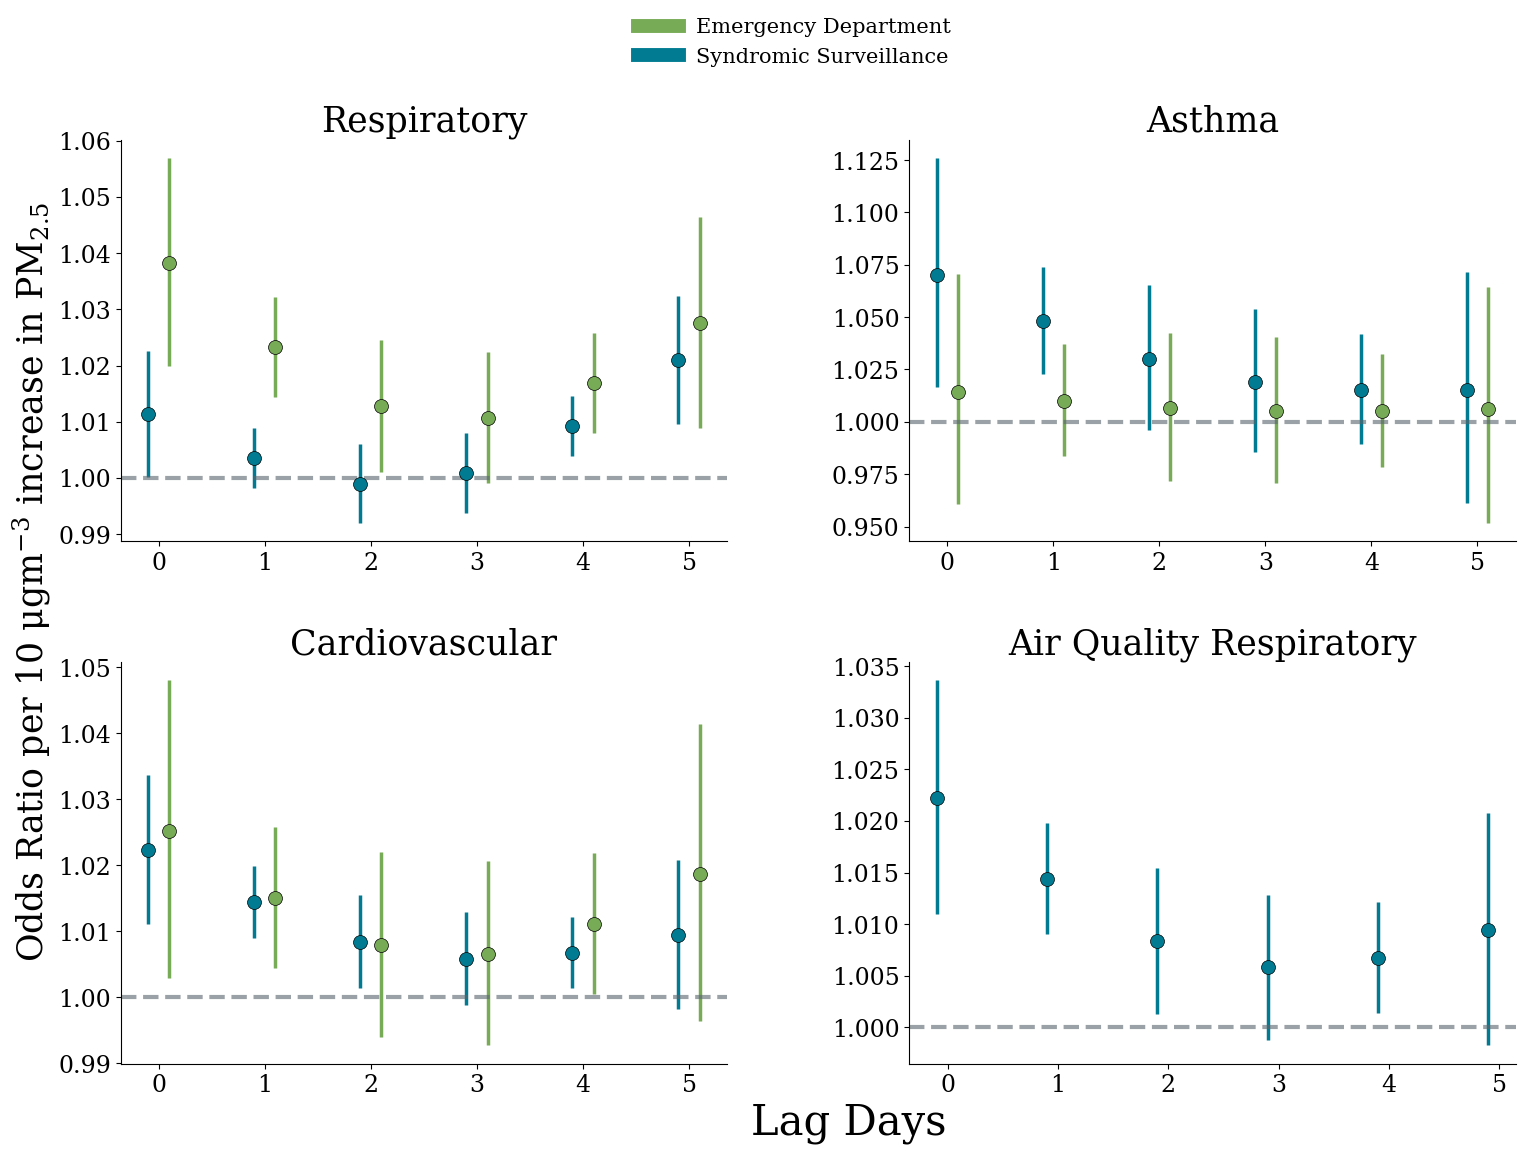

In [3]:
# Loop through plotting for 4 outcomes across all years 
outcomesED = ['allresp1', 'asthma1', 'allcardio1', '']
outcomesESS = ['BroadResp', 'Asthma', 'Cardio', 'AQResp']
titles = ['Respiratory', 'Asthma', 'Cardiovascular', 'Air Quality Respiratory']
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(18,12),
                        gridspec_kw = {'wspace': 0.3, 'hspace': 0.3})
axs=axs.flatten()
for i in range(0,4):
        axs[i].scatter(lagESSENCE['time'][lagESSENCE['outcome'] == outcomesESS[i]] -0.1,lagESSENCE['odds_ratio'][lagESSENCE['outcome'] == outcomesESS[i]], color = 'xkcd:ocean', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
        axs[i].vlines(x =lagESSENCE['time'][lagESSENCE['outcome'] == outcomesESS[i]]-0.1, ymin = lagESSENCE['lower_95'][lagESSENCE['outcome'] == outcomesESS[i]],
                      ymax = lagESSENCE['upper_95'][lagESSENCE['outcome'] == outcomesESS[i]], color = 'xkcd:ocean', lw = 2.5)
        
        axs[i].scatter(lagED['time'][lagED['outcome'] == outcomesED[i]]+0.1,lagED['odds_ratio'][lagED['outcome'] == outcomesED[i]], color = 'xkcd:asparagus', edgecolor = 'k', lw = .5, s = 100, zorder = 4)
        axs[i].vlines(x =lagED['time'][lagED['outcome'] == outcomesED[i]]+0.1, ymin = lagED['lower_95'][lagED['outcome'] == outcomesED[i]],
                      ymax = lagED['upper_95'][lagED['outcome'] == outcomesED[i]], color = 'xkcd:asparagus', lw = 2.5)
        axs[i].axhline(y = 1, color = 'xkcd:slate gray', ls = '--', lw = 3, alpha = .6)
        axs[i].set_xticks(np.arange(0,6, 1));
        axs[i].set_title(titles[i], fontsize = 25)
        axs[i].spines[['right', 'top']].set_visible(False)            
        if (i == 1):
            axs[i].plot([], [], color = 'xkcd:asparagus', label = 'Emergency Department', lw = 10)
            axs[i].plot([], [], color = 'xkcd:ocean', label = 'Syndromic Surveillance', lw = 10)
            axs[i].legend(bbox_to_anchor = [.1,1.35], fontsize = 15, frameon = False)
        if (i == 2):
            axs[i].set_xlabel('Lag Days', fontsize = 30, x = 1.2)
            axs[i].set_ylabel('Odds Ratio per 10 $\mu g m^{-3}$ increase in PM$_{2.5}$', fontsize = 25, y = 1.2)
fig.savefig('../Figures/CompareAllYearsEDvsESSENCE.png', dpi = 300, bbox_inches = 'tight')
